In [1]:
import os, sys
import gymnasium as gym
import time
import numpy as np
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import text_flappy_bird_gym
from Agents.SarsaLambdaAgent import SarsaLambdaAgent
from Src.utils import *

# Sarsa

## Training

  0%|          | 0/2000 [00:00<?, ?it/s]

Training completed. The agent has learned a policy!


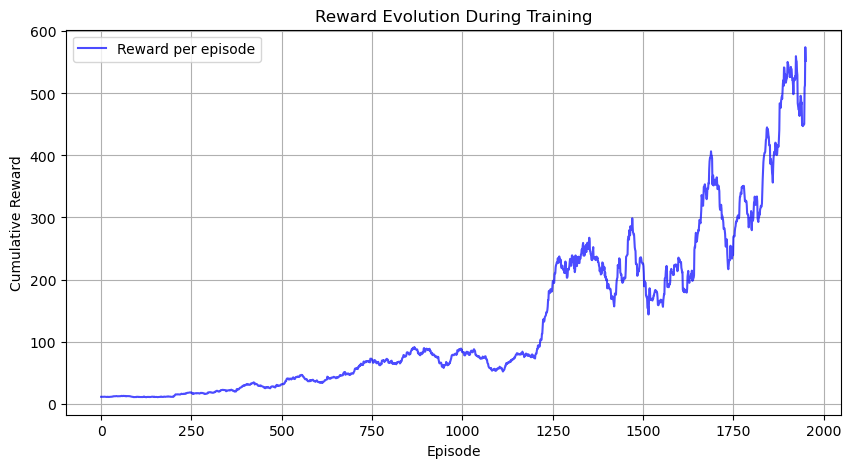

In [3]:
if __name__ == '__main__':
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
    
    # Get the size of the action space
    action_size = env.action_space.n
    state_shape = (14, 22)  # Tuple observation space: Discrete(14), Discrete(22)
    
    # Initialize the Sarsa(λ) agent with the necessary parameters
    agent = SarsaLambdaAgent(state_size=state_shape, action_size=action_size, alpha=0.2, gamma=0.95, lambd=0.96, epsilon=1.0)

    num_episodes = 2000  # Number of training episodes
    reward_history = []

    epsilon_min = 0.01  # Minimum exploration
    epsilon_decay = 0.995  # Gradual reduction

    for episode in tqdm(range(num_episodes)):
        obs, _ = env.reset()
        trajectory = []  # Stores (state, action, reward)
        done = False
        total_reward = 0

        # Initialize the action using the selection method
        action = agent.select_action(obs)

        while not done:
            next_obs, reward, done, _, info = env.step(action)
            next_action = agent.select_action(next_obs)

            # Add the transition to the trajectory
            trajectory.append((obs, action, reward))

            # Update the agent using the transition
            agent.update_policy(obs, action, reward, next_obs, next_action, done)

            obs = next_obs
            action = next_action
            total_reward += reward

        reward_history.append(total_reward)

        # Gradually reduce exploration
        agent.epsilon = max(epsilon_min, agent.epsilon * epsilon_decay)

    print("Training completed. The agent has learned a policy!")

    # Display the average rewards
    smoothed_rewards = moving_average(reward_history, window_size=50)
    plot_rewards(smoothed_rewards)

The **Cumulative Reward** curve is increasing more steadily than Monte Carlo. 

It seems that 2000 might not be enough episodes to show the full performance of this agent. But, it still manages to show gret performances.

## Results

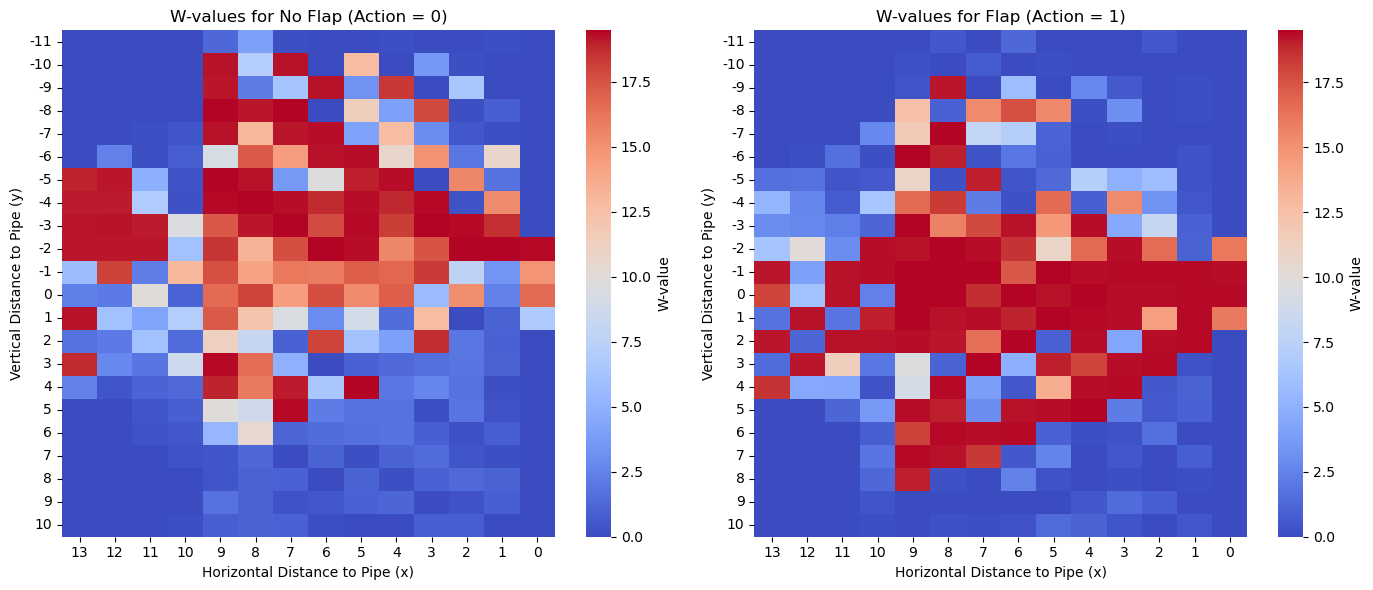

In [9]:
plot_w_values(agent.w)

The **W-values Matrix** shows that the agent learnt well. 

Effectively, for the left graph, we are more likely to **not Flap** when the vertical distance with the next pipe is high. This means that **if we are high in the sky, we let the bird fly and fall with the gravity**.

In the contrary, for the right graph, we are more likely to **Flap** if the vertical ditance to the next pipe is low. Which means that **if we are near to the ground, we will flap to gain altitude**.

Finally, in both graphs, we see that when the vertical and horizontal distances are near 0, both actions can be taken. This means that **if we are flying at the good altitude we wait for the bird to pass the pipe**.

**NB** : The vertical distance is positive when the bird is under the next pipe center, and negative when above it. 

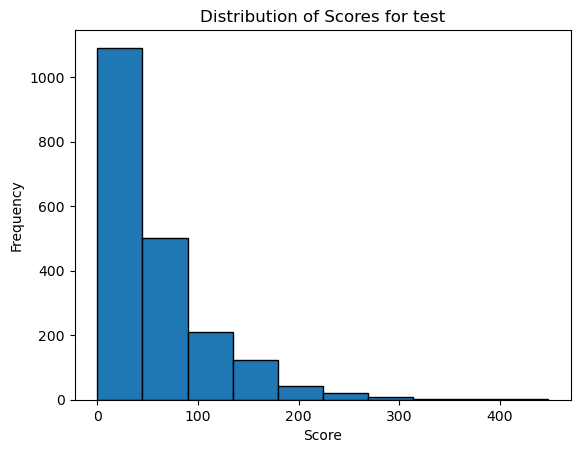

In [10]:
scores = []

for i in range(2000):

  obs, _ = env.reset()
  done = False

  while not done:
      # Select best action
      state = tuple(obs)

      action = agent.select_action(obs)

      obs, reward, done, _, info = env.step(action)
  scores.append(info["score"])

env.close()

plt.hist(scores, bins=10, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for test")
plt.show()

With this graph, we see that over 2000 try, a lot are around 0-100, and few of them can go above this, until around 300 or 400. 

**NB** The distribution depend on the agent performances, and the graph might change if we recompute the notebook.

  0%|          | 0/10 [00:00<?, ?it/s]

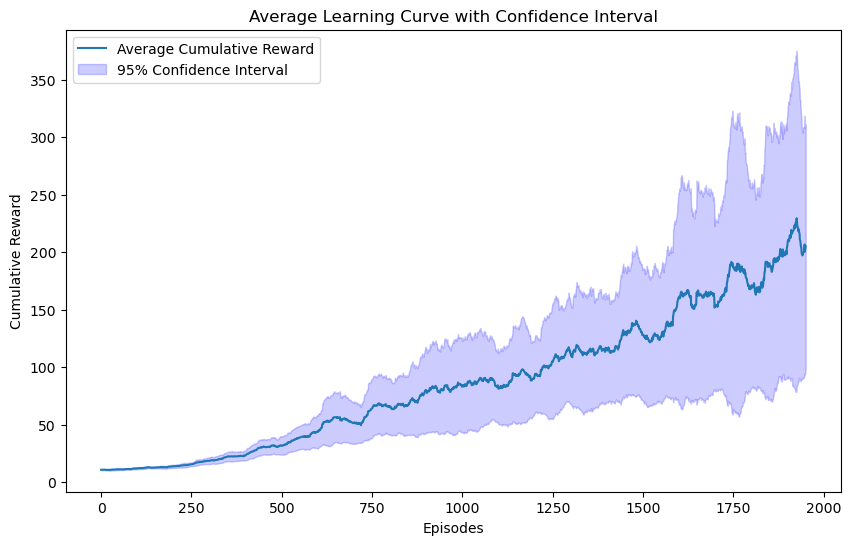

In [19]:
plot_confidence_interval(agent_type="sarsa")

This graph shows th **Cumulative reward** in average, with a certain confidence intervale. 

It seems that before 1000 episodes, it increases its performances. But after that point, it is much harder to improve.

In [12]:
# Test
obs, _ = env.reset()
done = False

while not done:
    # Render the game
    os.system("clear")
    sys.stdout.write(env.render())
    time.sleep(0.2)  # Control the display speed

    # Select the best action according to the trained policy
    action = agent.select_action(obs)

    obs, reward, done, _, info = env.step(action)

print("Test completed, final score:", info["score"])
env.close()

Text Flappy Bird!
Score: 0
----------------------
[                   |]
[                   |]
[                    ]
[                    ]
[                    ]
[                    ]
[                   |]
[      @            |]
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=13,dy=3)
Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                  | ]
[                    ]
[                    ]
[                    ]
[                    ]
[                  | ]
[      @           | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=12,dy=3)
Text Flappy Bird!
Score: 0
----------------------
[       

We can try manually a Flappyird game and see directly how far the agent is abale to go !